In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits 

In [33]:
cube = fits.open("/dat/milic/3D/l2/loc_dyn_32_32_16_series_tumag_l2.fits")[0].data

In [34]:
cube.shape

(31, 768, 768, 9)

In [35]:
bz = cube[:,:,:,0] * np.cos(cube[:,:,:,1])

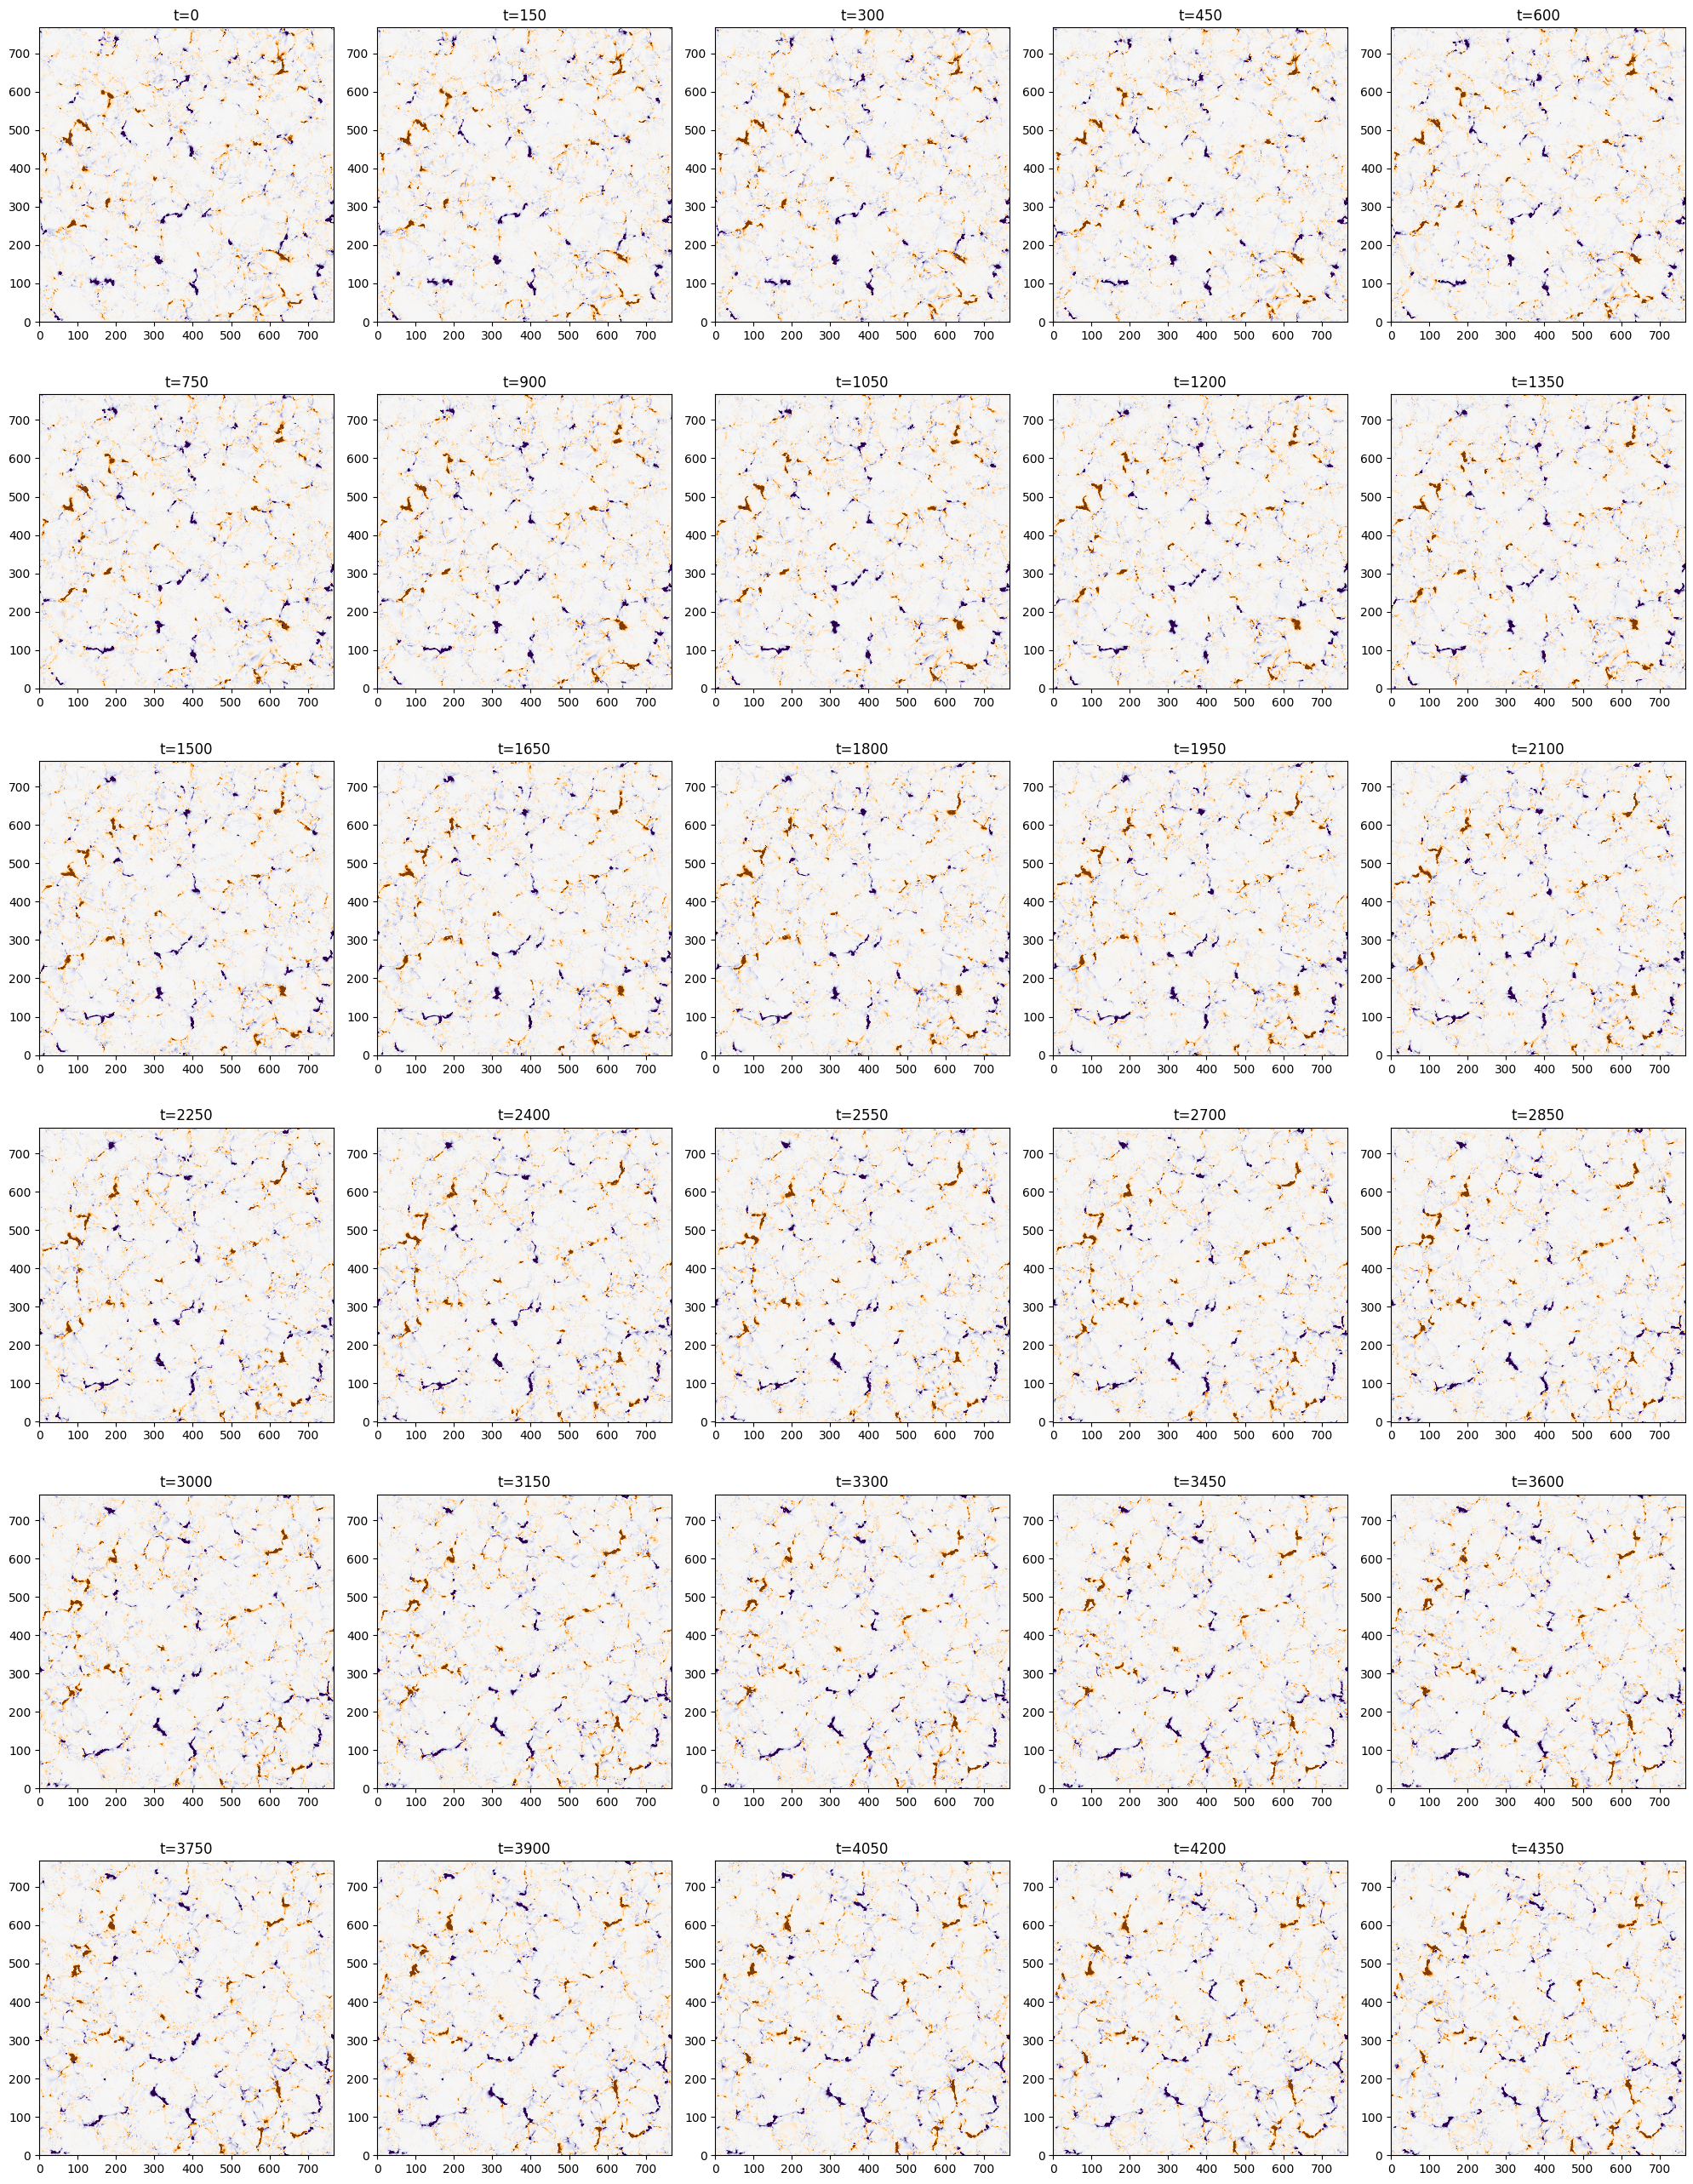

In [37]:
plt.figure(figsize=[20,26])
t = 0
for i in range(0,6):
    for j in range(0,5):
        plt.subplot(6,5,t+1)
        plt.imshow(bz[t].T, origin='lower', cmap='PuOr', vmin=-300,vmax=300)
        plt.title("t="+str(t*150))
        t+=1
        
plt.tight_layout()
plt.savefig("bz_ev_small.png",bbox_inches='tight')
        

In [15]:
import pyana 

In [16]:
stokes1 = pyana.fzread("/dat/milic/3D/3D_snapi_cubes/loc_dyn_32_32_16_0_tumag.f0")["data"]
stokes1.shape

(768, 768, 4, 622)

In [17]:
stokes2 = pyana.fzread("/dat/milic/3D/3D_snapi_cubes/loc_dyn_32_32_16_150_tumag.f0")["data"]
stokes2.shape

(768, 768, 4, 622)

In [18]:
mean1 = np.mean(stokes1, axis=(0,1))

In [19]:
mean2 = np.mean(stokes2, axis=(0,1))

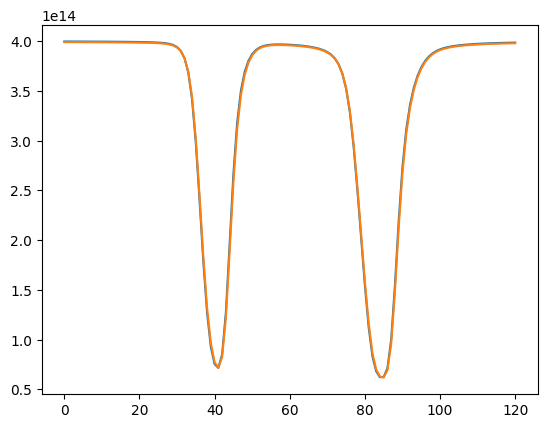

In [21]:
plt.plot(mean1[0,-121:])
plt.plot(mean2[0,-121:])

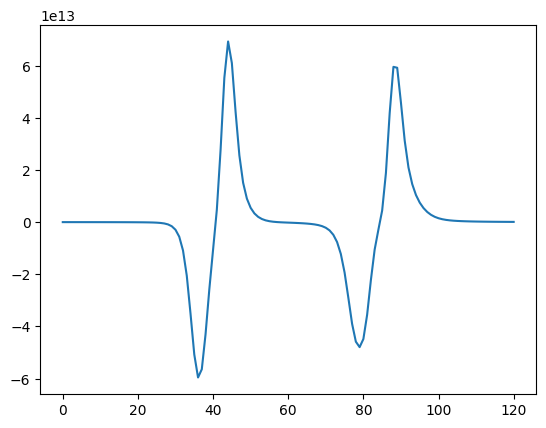

In [22]:
plt.plot(np.gradient(mean1[0,-121:]))
#plt.plot(mean2[0,-121:])

In [23]:
np.argmax(np.abs(np.gradient(mean1[0,-121:])))

44

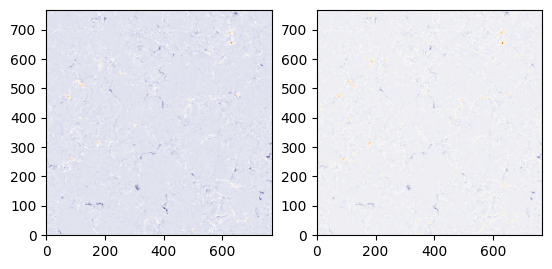

In [26]:
plt.subplot(121)
plt.imshow(stokes1[:,:,3,44].T, origin='lower', cmap='PuOr')
plt.subplot(122)
plt.imshow(stokes2[:,:,3,44].T, origin='lower', cmap='PuOr')